In [13]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [14]:
#Import CSV file
from google.colab import drive
drive.mount('/content/drive')

Bohara = '/content/drive/MyDrive/Biogeochem/Final/Bohara_etal_data.csv'
Bohara_df = pd.read_csv((Bohara), delimiter=",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#Print dataframe
Bohara_df

,Tree species,elevation,C,C std. err,N,N std. Err,P,P std. Err,Litter Mass Loss,K,K std. Err,C Release,C rel std. err,N Release,N rel std. err,P Release,P rel std. err
0,Alnus nepalensis D. Don,1300,37.93,0.39,2.32,0.10,0.74,0.03,75,1.42,0.13,80.54,2.59,66.46,5.52,96.51,0.66
1,Engelhardia spicata Lesch. Ex Blume.,1500,37.83,0.42,1.35,0.14,0.50,0.03,61,0.88,0.03,64.54,0.82,27.92,9.44,89.77,0.31
2,Castanopsis tribuloides (Sm.) A. DC.,1700,37.44,0.36,1.98,0.19,0.49,0.02,58,0.87,0.02,67.96,1.33,53.70,6.27,87.30,0.57
3,Eurya acuminata DC.,1900,37.89,0.06,1.86,0.08,0.39,0.03,43,0.66,0.01,56.05,0.58,37.53,3.48,87.40,1.24
4,Schima wallichii,1900,36.33,0.60,1.36,0.06,0.66,0.03,48,0.64,0.04,52.03,3.89,16.43,0.91,91.65,0.61
5,Rhododendron arboreum Sm.,2100,37.66,0.35,1.27,0.07,0.23,0.03,44,0.59,0.02,50.62,0.87,26.84,3.53,70.67,3.38
6,Quercus semecarpifolia Sm.,2300,36.70,0.07,1.33,0.08,0.44,0.01,41,0.60,0.02,47.65,1.73,35.59,3.43,85.78,0.46
7,Pinus roxburghii Sarg.,2300,37.16,0.19,1.07,0.02,0.35,0.05,45,0.53,0.02,45.23,0.96,23.00,1.01,77.69,2.54
8,Lyonia ovalifolia (Wall.) Drude,2500,37.11,0.55,1.20,0.01,0.32,0.01,47,0.63,0.02,51.65,1.09,21.39,4.31,82.29,0.42


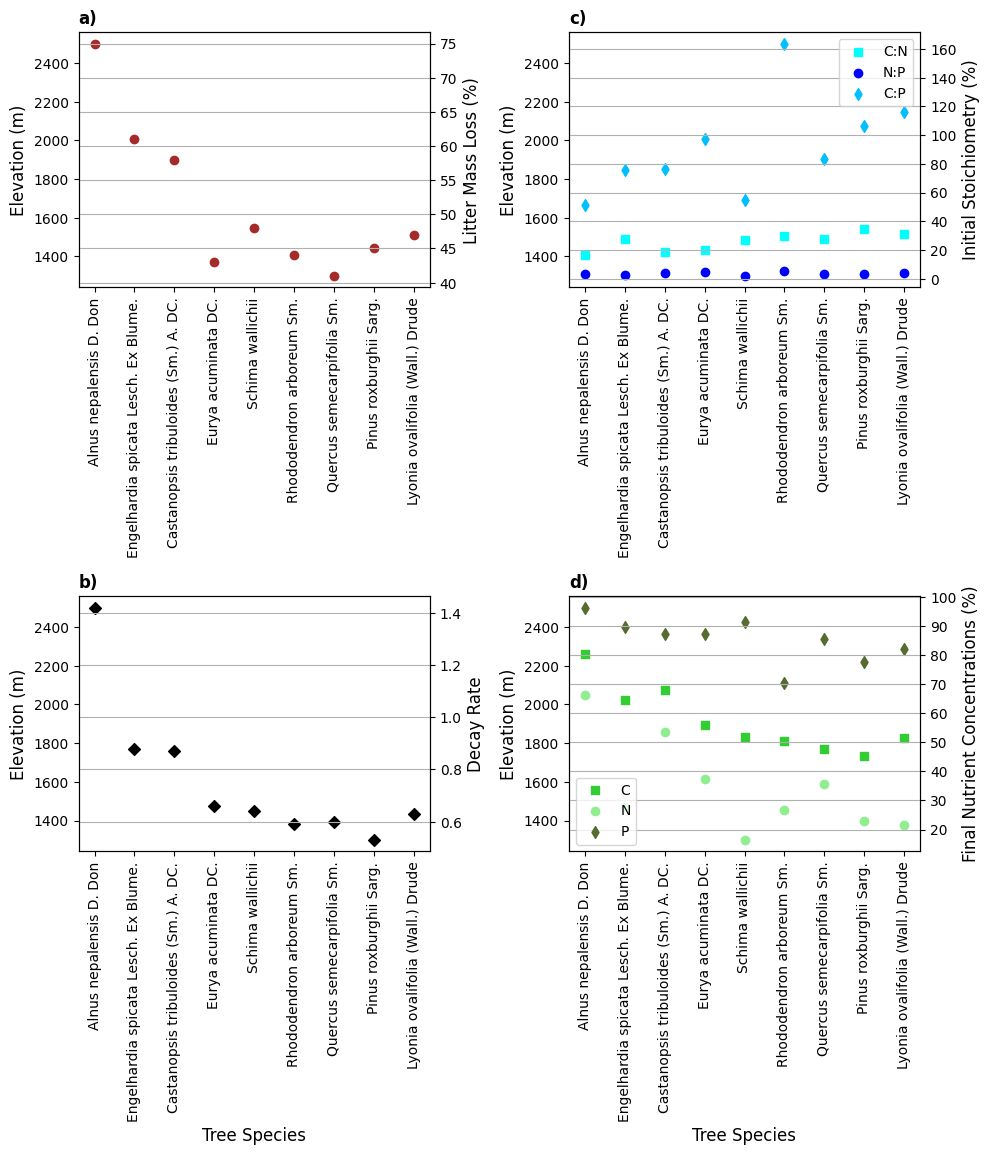

In [16]:
#Part 2 Figure Generation and Analysis
plt.figure(figsize=(10,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(Bohara_df['elevation'], color='w')
plt.xticks(rotation='vertical') #rotate the tree species names to vertical so they're easier to distinguish
ax1.set_ylabel('Elevation (m)', fontsize=12)
plt.title('a)', loc='left', weight='bold')

ax2 = ax1.twinx() #double axis
ax2.scatter(Bohara_df['Tree species'], Bohara_df['Litter Mass Loss'], label='Litter Mass Loss', color='brown', marker='o')
ax2.set_ylabel('Litter Mass Loss (%)', fontsize=12)
plt.grid()

ax3 = plt.subplot(4,2,3)
ax3.plot(Bohara_df['elevation'], color='w')
plt.xticks(rotation='vertical') #rotate tree species names
ax3.set_ylabel('Elevation (m)', fontsize=12)
ax3.set_xlabel('Tree Species', fontsize=12)
plt.title('b)', loc='left', weight='bold')

ax4 = ax3.twinx() #double axis
ax4.scatter(Bohara_df['Tree species'], Bohara_df['K'], label='Decay rate', color='k', marker='D')
ax4.set_ylabel('Decay Rate', fontsize=12)
plt.grid()

ax5 = plt.subplot(4,2,4)
ax5.plot(Bohara_df['elevation'], color='w')
plt.xticks(rotation='vertical')
ax5.set_ylabel('Elevation (m)', fontsize=12)
ax5.set_xlabel('Tree Species', fontsize=12)
plt.title('d)', loc='left', weight='bold')

ax6 = ax5.twinx()
ax6.scatter(Bohara_df['Tree species'], Bohara_df['C\xa0Release'], label='C', color='limegreen', marker='s')
ax6.scatter(Bohara_df['Tree species'], Bohara_df['N\xa0Release'], label='N', color='lightgreen', marker='o')
ax6.scatter(Bohara_df['Tree species'], Bohara_df['P\xa0Release'], label='P', color='darkolivegreen', marker='d')
plt.legend(loc='best')
ax6.set_ylabel('Final Nutrient Concentrations (%)', fontsize=12)
plt.grid()

ax7 = plt.subplot(4,2,2)
ax7.plot(Bohara_df['elevation'], color='w')
plt.xticks(rotation='vertical')
ax7.set_ylabel('Elevation (m)', fontsize=12)
plt.title('c)', loc='left', weight='bold')

ax8 = ax7.twinx()
ax8.scatter(Bohara_df['Tree species'], (Bohara_df['C']/Bohara_df['N']), label='C:N', color='cyan', marker='s') #Divided C by N to get its ratio
ax8.scatter(Bohara_df['Tree species'], (Bohara_df['N']/Bohara_df['P']), label='N:P', color='blue', marker='o') #Divided N by P to get its ratio
ax8.scatter(Bohara_df['Tree species'], (Bohara_df['C']/Bohara_df['P']), label='C:P', color='deepskyblue', marker='d') #Divided C  by P to get its ratio
plt.legend(loc='best')
ax8.set_ylabel('Initial Stoichiometry (%)', fontsize=12)
plt.grid()


plt.tight_layout()
plt.savefig('Final_figure.jpg', dpi=300)
plt.show()

In [17]:
#Part 3 Calculation

#Equations
#Flux CO2 = kCO2*(CO2atm - CO2stream)

#Units
#kCO2: m/d
#CO2atm: mol/L
#CO2stream: mol/L
#stream_reach: m
#stream_width: m
#C_atomic_mass: g/mol
#Flux_C: kg C/yr
#1000 L/m^3
#1 kg/1000 g
#365 days/yr

#Variables
kCO2 =  2.3
CO2atm = 1.3*10**-8
CO2stream = 5*10**-5
stream_reach = 100
stream_width = 0.5
C_atomic_mass = 12.01

#Calculation kg C/yr
k_CO2 = stream_reach*stream_width*kCO2*365
CO2_diff = ((CO2atm)-(CO2stream))
Flux_C = (k_CO2*CO2_diff*1000*C_atomic_mass)*(1/1000)
print(Flux_C)

-25.199433943249996
